In [1]:
!pip install keras
!pip install tensorflow

## UTILITIES

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gensim.models.doc2vec import TaggedDocument
import re
import csv
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.regularizers import l2


In [2]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from collections import Counter, OrderedDict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
#from flair.models import TextClassifier
#from flair.data import Sentence
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SpatialDropout1D
from keras import backend as K
from tensorflow.keras import models
from keras.layers import Bidirectional
from keras.layers import Dropout

In [3]:
df=pd.read_csv("df_preprocessed.csv")

In [4]:
df

,tweet,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,...,Hash_words_ad,clean_tweet,clean_anonymized_description,tweet_len,word_count,tokenized_text,pos_tags,lemmatized_text,stemmed_text,swear_word_bin
0,@unknown Con tutte le denunce che si sta becca...,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,...,No hashtags,Con tutte le denunce che si sta beccando Salvi...,Avete presente quegli stereotipi sui siciliani...,119,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...","[('denunce', 'NOUN'), ('beccando', 'VERB'), ('...","['denuncia', 'beccare', 'Salvini', 'rischiare'...","['denunc', 'becc', 'salvin', 'risc', 'aument',...",0
1,#PRESCRIZIONE : I (t)re magi hanno trovato l’a...,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,...,No hashtags,PRESCRIZIONE I tre magi hanno trovato laccordo...,Prof di latino e Deputata PDAma lo sport la Ro...,254,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...","[('PRESCRIZIONE', 'VERB'), ('tre', 'NUM'), ('m...","['PRESCRIZIONE', 'tre', 'mago', 'trovare', 'la...","['prescrizion', 'tre', 'mag', 'trov', 'laccord...",0
2,Il #m5s ha votato contro le #unionicivili addu...,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,...,No hashtags,Il m5s ha votato contro le unionicivili adduce...,Medico appassionato di Cinema d'Autore Musica ...,256,41,"['m5s', 'votato', 'unionicivili', 'adducendo',...","[('m5s', 'NOUN'), ('votato', 'VERB'), ('unioni...","['m5s', 'votare', 'unionicivile', 'adducere', ...","['m5s', 'vot', 'unionicivil', 'adduc', 'scus',...",1
3,La #Lega e il #m5s stanno dando a bere all'opi...,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,...,No hashtags,La Lega e il m5s stanno dando a bere all'opini...,nodescription,247,39,"['Lega', 'm5s', 'dando', 'bere', ""all'opinione...","[('Lega', 'VERB'), ('m5s', 'PROPN'), ('dando',...","['lega', 'm5s', 'dare', 'bere', 'a il', 'opini...","['leg', 'm5s', 'dand', 'ber', ""all'opinion"", '...",0
4,Che cosa cambia questa #legge? Caro @667517147...,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,...,No hashtags,Che cosa cambia questa legge Caro con il decre...,Veneto Assessore Regionale Sviluppo Economico ...,192,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...","[('cambia', 'VERB'), ('legge', 'NOUN'), ('Caro...","['cambiare', 'legge', 'Caro', 'decretoinsicure...","['camb', 'legg', 'car', 'decretoinsicurezz', '...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917,"@306266219847013 Esatto brava , ti dico di piu...",0,1,0.0,0.0,1.0,0.0,10922.0,373.0,491.0,...,No hashtags,Esatto brava ti dico di piu i nazisti nel cerc...,Il Covid e le guerre sono il braccio armato de...,216,38,"['Esatto', 'brava', 'dico', 'piu', 'nazisti', ...","[('Esatto', 'NOUN'), ('brava', 'ADJ'), ('dico'...","['esatto', 'bravo', 'dico', 'piu', 'nazista', ...","['esatt', 'brav', 'dic', 'piu', 'nazist', 'cer...",0
9918,@527727106662135 Togliere la parola non vaccin...,0,1,0.0,0.0,1.0,0.0,721.0,31.0,169.0,...,No hashtags,Togliere la parola non vaccinati e mettere ebr...,Galileo Copernico Giordano Bruno furono consid...,57,10,"['Togliere', 'parola', 'vaccinati', 'mettere',...","[('Togliere', 'VERB'), ('parola', 'NOUN'), ('v...","['Togliere', 'parola', 'vaccinare', 'mettere',...","['togl', 'parol', 'vaccin', 'mett', 'ebre', 'u...",0
9919,@298046772245367 @232578747771124 Lo sai o no ...,0,1,0.0,0.0,1.0,0.0,116.0,9.0,30.0,...,No hashtags,Lo sai o no che i musulmani riconoscono Cristo...,nodescription,116,20,"['sai', 'musulmani', 'riconoscono', 'Cristo', ...","[('sai', 'VERB'), ('musulmani', 'NOUN'), ('ric...","['sai', 'musulmano', 'riconoscere', 'Cristo', ...","['sai', 'musulman', 'riconosc', 'crist', 'prof...",0
9920,Berlino - Memoriale per gli ebrei assassinati ...,0,1,4.0,55.0,0.0,0.0,5672.0,2544.0,2501.0,...,No hashtags,Berlino Memoriale per gli ebrei assassinati dE...,Se pensi di non farcela riordina l'armadio Ten...,66,10,"['Berlino', 'Memoriale', 'ebrei', 'assassinati...","[('Berlino', '

In [5]:
max_features = 30000
maxlen = 500
batch_size = 512
embedding_dims = 100
hidden_dims = 20

## STARTING

In [ ]:
tagged_data = list()
for index, row in df.iterrows():
    # row['lemmatized_tweets'] rappresenta la colonna con i tweet lemmatizzati e preprocessati
    # Utilizza re.split per dividere il testo in parole e converti tutto in minuscolo
    words = re.split('[\W\d_]+', row['lemmatized_text'].lower())

    # Crea un oggetto TaggedDocument e aggiungilo alla lista
    tagged_data.append(TaggedDocument(words=words, tags=[str(index)]))

In [ ]:
tagged_data[:5]

[TaggedDocument(words=['', 'denuncia', 'beccare', 'salvini', 'rischiare', 'aumentare', 'statistica', 'reato', 'commettere', 'italiano', ''], tags=['0']),
 TaggedDocument(words=['', 'prescrizione', 'tre', 'mago', 'trovare', 'laccordo', 'primo', 'legge', 'proceduro', 'durgenza', 'però', 'entrare', 'vigore', 'anno', 'nasce', 'categoria', 'urgenza', 'differire', 'piangere', 'litalia', 'm', 's', 'ridere', ''], tags=['1']),
 TaggedDocument(words=['', 'm', 's', 'votare', 'unionicivile', 'adducere', 'scusa', 'vergognoso', 'sostenere', 'ddlpillon', 'riportare', 'litalia', 'medioevo', 'divorzio', 'tutelare', 'donna', 'piano', 'piano', 'sparisce', 'alibi', 'rimanere', 'sostanza', 'merde', 'fasciste', 'nopillon', ''], tags=['2']),
 TaggedDocument(words=['', 'lega', 'm', 's', 'dare', 'bere', 'a', 'il', 'opinione', 'pubblico', 'proceduradiinfrazione', 'colpa', 'pd', 'renzi', 'gentiloni', 'inquietante', 'italiano', 'credere', 'davvero', 'onestà', 'intellettuale', 'pari', 'novembre', 'manovradelpopolo

In [ ]:
import gensim
from gensim.models import Doc2Vec
model = Doc2Vec(tagged_data, vector_size=170, window=10, min_count=3, epochs=10)

#vector_size=dimensione del vettore che viene creato.
#window= è la distanza massima tra la parola corrente e la parola predetta dentro la sequenza

As a very basic experiment, since we are already managing some problem connected to the preprocessing of the text(try to make understandable that the word "Salvini" have to remain like that and don't be lemmatized as "salvino") we want to explore the similarity with the word "salvino". We notice that, since the lemmatizer change the structure of this word, its meaning doesn't change. It is associated with Conte, Governo, Renzi, hashtag as iostoconrobero(Speranza, Minister), dimaio. Seems strange that Draghi is not strictly associated with them. It might be cause of the fact the sudden exist of the name "Draghi" as prime minister had created furor only in some user and not in the other. We will try to do the same with NER output.

In [ ]:
model.wv.most_similar(['salvino'])


[('legare', 0.9860526323318481),
 ('salvini', 0.9838139414787292),
 ('fdi', 0.9837953448295593),
 ('dimaio', 0.9804694056510925),
 ('leu', 0.9777477979660034),
 ('vota', 0.9776481986045837),
 ('governare', 0.9735984206199646),
 ('conte', 0.9696361422538757),
 ('letta', 0.9690291285514832),
 ('italiamorto', 0.9689366817474365)]

In [ ]:
model.wv.most_similar(['salvini'])

[('salvino', 0.983814001083374),
 ('conte', 0.9752814769744873),
 ('governo', 0.9729632139205933),
 ('legare', 0.9630873799324036),
 ('leu', 0.9510477185249329),
 ('dimaio', 0.949779748916626),
 ('fdi', 0.9489536285400391),
 ('renzi', 0.9483312368392944),
 ('vota', 0.9476805925369263),
 ('proceduradinfrazione', 0.9347253441810608)]

In [ ]:
model.wv.most_similar(['draghi'])


[('salvini', 0.9176692366600037),
 ('meloni', 0.908865749835968),
 ('dimissioni', 0.9056168794631958),
 ('aprile', 0.9001215100288391),
 ('memes', 0.8969162106513977),
 ('salvino', 0.8856795430183411),
 ('bagnaio', 0.8846206068992615),
 ('mef', 0.8827675580978394),
 ('iltempoquotidiano', 0.8778620362281799),
 ('conte', 0.8722373843193054)]

## FUNCTIONS

In [6]:
# Find longest tweet in sequences
def max_tweet(sequences):
    max_length = len(sequences[0])
    for i in range(1, len(sequences)):
        if len(sequences[i]) > max_length:
            max_length = len(sequences[i])
    return max_length

In [7]:
# Plot train/test loss and accuracy
def plotLoss(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'g', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [8]:
df['clean_tweet'] = df['clean_tweet'].astype(str).apply(lambda x: x.lower())


In [9]:
X = df['clean_tweet']
y = df["is_hate_speech"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(6945,)

In [12]:
y_train.shape

(6945,)

In [13]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [14]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)

x_train shape: (6945, 500)
x_test shape: (2977, 500)


In [15]:
X_train.shape

(6945, 500)

# LSTM

## MODEL 1

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, embedding_dims))
model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer= l2(0.25), recurrent_regularizer=l2(0.25)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary

Build model...


<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x78e0f60d7b80>>

In [ ]:
epochs = 20
print('Train...')
hist1=model.fit(X_train, y_train,
          batch_size=512,
          epochs=epochs,
          shuffle=True,
          validation_split=0.1)

Train...
Epoch 1/20
13/13 [==============================] - 41s 3s/step - loss: 18.8436 - accuracy: 0.6693 - val_loss: 16.7624 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 32s 3s/step - loss: 15.3543 - accuracy: 0.6694 - val_loss: 13.6350 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 34s 3s/step - loss: 12.4751 - accuracy: 0.6694 - val_loss: 11.0727 - val_accuracy: 0.6791
Epoch 4/20
13/13 [==============================] - 31s 2s/step - loss: 10.1236 - accuracy: 0.6694 - val_loss: 8.9871 - val_accuracy: 0.6791
Epoch 5/20
13/13 [==============================] - 30s 2s/step - loss: 8.2132 - accuracy: 0.6694 - val_loss: 7.2967 - val_accuracy: 0.6791
Epoch 6/20
13/13 [==============================] - 39s 3s/step - loss: 6.6667 - accuracy: 0.6694 - val_loss: 5.9311 - val_accuracy: 0.6791
Epoch 7/20
13/13 [==============================] - 36s 3s/step - loss: 5.4186 - accuracy: 0.6694 - val_loss: 4.8321 - val_accuracy: 0.6791
Epoc

In [ ]:
plotLoss(hist1)

In [ ]:
predictions = model.predict(X_test)
predictions

94/94 [==============================] - 6s 58ms/step


array([[0.41815853],
       [0.27994415],
       [0.6762098 ],
       ...,
       [0.31501547],
       [0.14967065],
       [0.23021235]], dtype=float32)

In [ ]:
predictions.round()

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test

2084    1
4605    0
8411    1
4149    1
2875    0
       ..
9150    0
7954    1
7639    1
2114    0
8620    0
Name: is_hate_speech, Length: 2977, dtype: int64

In [ ]:
import numpy as np
errors = y_test-predictions.round().flatten()
errors

2084    1.0
4605    0.0
8411    0.0
4149    0.0
2875    0.0
       ... 
9150    0.0
7954    0.0
7639    1.0
2114    0.0
8620    0.0
Name: is_hate_speech, Length: 2977, dtype: float64

In [ ]:
len(errors[errors==0])

2440

In [ ]:
len(errors[errors==0])/len(errors)

0.8196170641585488

In [ ]:
predicted_label = [int(a) for a in predictions.round()]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_label))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1996
           1       0.86      0.54      0.66       981

    accuracy                           0.82      2977
   macro avg       0.83      0.75      0.77      2977
weighted avg       0.83      0.82      0.81      2977



In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_label)

# Plot della confusion matrix utilizzando seaborn e matplotlib
class_names = ["No Hate", "Hate"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_label)

# Calcola l'area sotto la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## MODELLO 2, 32 NEURONI E DROPOUT

In [ ]:
lst_mod4 = Sequential()
lst_mod4.add(Embedding(max_features, embedding_dims))
#lst_mod4.add(Dropout(0.2))
lst_mod4.add(LSTM(32,
               dropout = 0.2,
               recurrent_dropout = 0.5, kernel_regularizer= l2(0.25), recurrent_regularizer=l2(0.25)))
#lst_mod4.add(Dropout(0.2))
lst_mod4.add(Dense(1, activation='sigmoid'))
lst_mod4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lst_mod4.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x78e0e691d4b0>>

In [ ]:
hist_4 = lst_mod4.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs=20, batch_size=128)

Epoch 1/20
38/38 [==============================] - 50s 1s/step - loss: 26.2855 - accuracy: 0.6702 - val_loss: 17.5500 - val_accuracy: 0.6583
Epoch 2/20
38/38 [==============================] - 44s 1s/step - loss: 12.3881 - accuracy: 0.6754 - val_loss: 8.1756 - val_accuracy: 0.6583
Epoch 3/20
38/38 [==============================] - 43s 1s/step - loss: 5.7677 - accuracy: 0.6754 - val_loss: 3.8579 - val_accuracy: 0.6583
Epoch 4/20
38/38 [==============================] - 45s 1s/step - loss: 2.7729 - accuracy: 0.6756 - val_loss: 1.9574 - val_accuracy: 0.6583
Epoch 5/20
38/38 [==============================] - 51s 1s/step - loss: 1.4713 - accuracy: 0.6783 - val_loss: 1.1545 - val_accuracy: 0.6718
Epoch 6/20
38/38 [==============================] - 47s 1s/step - loss: 0.9057 - accuracy: 0.7437 - val_loss: 0.8159 - val_accuracy: 0.7510
Epoch 7/20
38/38 [==============================] - 46s 1s/step - loss: 0.6278 - accuracy: 0.8406 - val_loss: 0.6656 - val_accuracy: 0.8047
Epoch 8/20
38/38 

In [ ]:
# Plot train/test loss and accuracy
plotLoss(hist_4)

In [ ]:
predictions = lst_mod4.predict(X_test)
predictions

94/94 [==============================] - 8s 86ms/step


array([[0.38036445],
       [0.05021066],
       [0.98511904],
       ...,
       [0.1427005 ],
       [0.01356566],
       [0.01243962]], dtype=float32)

In [ ]:
predictions.round()

array([[0.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test

2084    1
4605    0
8411    1
4149    1
2875    0
       ..
9150    0
7954    1
7639    1
2114    0
8620    0
Name: is_hate_speech, Length: 2977, dtype: int64

In [ ]:
import numpy as np
errors = y_test-predictions.round().flatten()
errors

2084    1.0
4605    0.0
8411    0.0
4149    0.0
2875    0.0
       ... 
9150    0.0
7954    0.0
7639    1.0
2114    0.0
8620    0.0
Name: is_hate_speech, Length: 2977, dtype: float64

In [ ]:
len(errors[errors==0])

2481

In [ ]:
len(errors[errors==0])/len(errors)

0.8333893181054753

In [ ]:
predicted_labels = [int(a) for a in predictions.round()]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1996
           1       0.83      0.62      0.71       981

    accuracy                           0.83      2977
   macro avg       0.83      0.78      0.80      2977
weighted avg       0.83      0.83      0.83      2977



In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot della confusion matrix utilizzando seaborn e matplotlib
class_names = ["No Hate", "Hate"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_labels)

# Calcola l'area sotto la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot della curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## MODELLO 3 CON 2 LAYER LSTM



In [ ]:
lstm_5 = Sequential()
lstm_5.add(Embedding(max_features, embedding_dims))
#lstm_5.add(Dropout(0.2))
lstm_5.add(LSTM(16,
               dropout = 0.2,
               recurrent_dropout = 0.5, return_sequences=True, kernel_regularizer= l2(0.25), recurrent_regularizer=l2(0.25)))
#lstm_5.add(Dropout(0.2))
lstm_5.add(LSTM(8,
               dropout = 0.2,
               recurrent_dropout = 0.5, kernel_regularizer= l2(0.25), recurrent_regularizer=l2(0.25)))
lstm_5.add(Dense(1, activation='sigmoid'))
lstm_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_5.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x78e0d0436830>>

In [ ]:
hist_5 = lstm_5.fit(X_train, y_train,
                    validation_split = 0.3,
                    epochs=20, batch_size=512)

Epoch 1/20
10/10 [==============================] - 127s 13s/step - loss: 0.6799 - accuracy: 0.6589 - val_loss: 0.6639 - val_accuracy: 0.6583
Epoch 2/20
10/10 [==============================] - 53s 5s/step - loss: 0.6406 - accuracy: 0.6754 - val_loss: 0.6425 - val_accuracy: 0.6583
Epoch 3/20
10/10 [==============================] - 47s 5s/step - loss: 0.6084 - accuracy: 0.6754 - val_loss: 0.6257 - val_accuracy: 0.6583
Epoch 4/20
10/10 [==============================] - 51s 5s/step - loss: 0.5650 - accuracy: 0.6846 - val_loss: 0.5905 - val_accuracy: 0.6943
Epoch 5/20
10/10 [==============================] - 51s 5s/step - loss: 0.4900 - accuracy: 0.7760 - val_loss: 0.5559 - val_accuracy: 0.7394
Epoch 6/20
10/10 [==============================] - 47s 5s/step - loss: 0.3940 - accuracy: 0.8792 - val_loss: 0.5345 - val_accuracy: 0.7567
Epoch 7/20
10/10 [==============================] - 49s 5s/step - loss: 0.3066 - accuracy: 0.9385 - val_loss: 0.5992 - val_accuracy: 0.7087
Epoch 8/20
10/10 [

In [ ]:
# Plot train/test loss and accuracy
plotLoss(hist_5)

In [ ]:
acc = hist_5.history['accuracy']
val_acc = hist_5.history['val_accuracy']
loss = hist_5.history['loss']
val_loss = hist_5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predictions = lstm_5.predict(X_test)
predictions

94/94 [==============================] - 14s 142ms/step


array([[0.09475287],
       [0.507139  ],
       [0.8650749 ],
       ...,
       [0.47934082],
       [0.02365139],
       [0.02053283]], dtype=float32)

In [ ]:
predictions.round()

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
y_test

2084    1
4605    0
8411    1
4149    1
2875    0
       ..
9150    0
7954    1
7639    1
2114    0
8620    0
Name: is_hate_speech, Length: 2977, dtype: int64

In [ ]:
import numpy as np
errors = y_test-predictions.round().flatten()
errors

2084    1.0
4605   -1.0
8411    0.0
4149    0.0
2875    0.0
       ... 
9150    0.0
7954    0.0
7639    1.0
2114    0.0
8620    0.0
Name: is_hate_speech, Length: 2977, dtype: float64

In [ ]:
len(errors[errors==0])

2215

In [ ]:
len(errors[errors==0])/len(errors)

0.7440376217668794

In [ ]:
predicted_labels3 = [int(a) for a in predictions.round()]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels3))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1996
           1       0.61      0.62      0.61       981

    accuracy                           0.74      2977
   macro avg       0.71      0.71      0.71      2977
weighted avg       0.75      0.74      0.74      2977



# CNN



In [16]:
!pip install transformers


In [17]:
!pip3 install torch torchvision

In [18]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gensim.models.doc2vec import TaggedDocument
import re
import csv
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from collections import Counter, OrderedDict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SpatialDropout1D
from keras import backend as K
from tensorflow.keras import models
from keras.layers import Bidirectional


In [19]:
import torch
from transformers import BertTokenizer, BertConfig
from transformers import BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup
from distutils.version import LooseVersion as LV
from sklearn.model_selection import train_test_split
import io
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.utils import pad_sequences

## CNN MODEL 1

In [20]:
X_train.shape

(6945, 500)

In [23]:
#N-F/S+1
from keras.regularizers import l2

In [24]:
filters = 70 # dimensionality of the output space
kernel_size = 50 # height and width of the convolution window
maxle=100

In [25]:
print('Build model...')
cnn = Sequential()

# We start off with an efficient embedding layer which maps our vocab indices
# into embedding_dims dimensions
cnn.add(Embedding(max_features, embedding_dims))

cnn.add(Dropout(0.2))

# We add a Convolution1D, which will learn
# word group filters of size filter_length:

# This layer creates a convolution kernel that is convolved with the layer input
# over a single spatial (or temporal) dimension to produce a tensor of outputs
cnn.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1, kernel_regularizer=l2(0.01)))

# We use max pooling:
cnn.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
cnn.add(Dense(hidden_dims,
              kernel_regularizer=l2(0.01)))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))

# We add the second vanilla hidden layer:
cnn.add(Dense(hidden_dims,
              kernel_regularizer=l2(0.01)))
cnn.add(Dropout(0.2))
cnn.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn.add(Dense(1,
              kernel_regularizer=l2(0.01)))
cnn.add(Activation('sigmoid'))

cnn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cnn.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         3000000   
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 70)          350070    
                                                                 
 global_max_pooling1d (Glob  (None, 70)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 20)                1420      
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                       

In [27]:
epochs = 20
cnn_1=cnn.fit(X_train, y_train,
          batch_size=512,
          epochs=epochs,
          shuffle=True,
          validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 155s 14s/step - loss: 1.5921 - accuracy: 0.6424 - val_loss: 1.2728 - val_accuracy: 0.6695
Epoch 2/20
11/11 [==============================] - 151s 13s/step - loss: 1.1701 - accuracy: 0.6634 - val_loss: 1.0786 - val_accuracy: 0.6695
Epoch 3/20
11/11 [==============================] - 151s 14s/step - loss: 1.0499 - accuracy: 0.6668 - val_loss: 1.0175 - val_accuracy: 0.6695
Epoch 4/20
11/11 [==============================] - 148s 14s/step - loss: 1.0028 - accuracy: 0.6683 - val_loss: 0.9766 - val_accuracy: 0.6695
Epoch 5/20
11/11 [==============================] - 152s 14s/step - loss: 0.9592 - accuracy: 0.6704 - val_loss: 0.9357 - val_accuracy: 0.6695
Epoch 6/20
11/11 [==============================] - 146s 13s/step - loss: 0.9223 - accuracy: 0.6703 - val_loss: 0.9038 - val_accuracy: 0.6695
Epoch 7/20
11/11 [==============================] - 146s 13s/step - loss: 0.8915 - accuracy: 0.6704 - val_loss: 0.8735 - val_accuracy: 0.6695
Epoch 

In [27]:
predictions = cnn.predict(X_test)

94/94 [==============================] - 20s 212ms/step


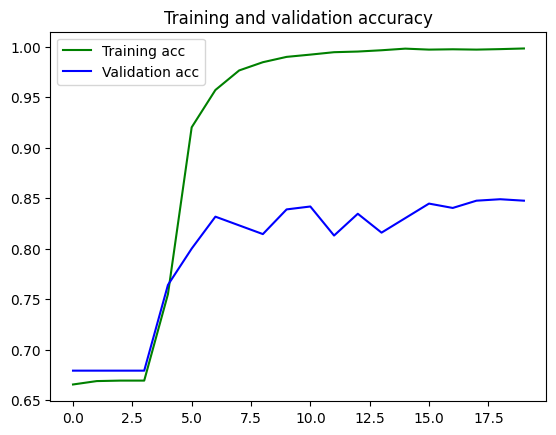

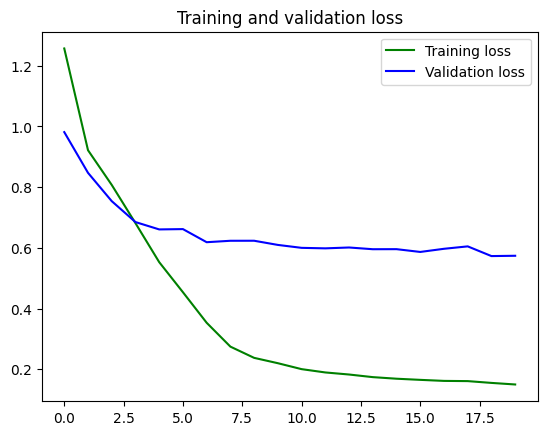

In [28]:
# Plot train/test loss and accuracy
plotLoss(cnn_1)

In [29]:
# Find train and test f1
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9840
Testing Accuracy:  0.8482


In [30]:
y_pred = cnn.predict(X_test).astype(int)

y_scores = cnn.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

94/94 [==============================] - 20s 212ms/step
Accuracy 0.6704736311723212
F1-score [0.80273477 0.        ]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.00      0.00      0.00       981

    accuracy                           0.67      2977
   macro avg       0.34      0.50      0.40      2977
weighted avg       0.45      0.67      0.54      2977



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN MODELLO 1 BIS

In [31]:
##hyper parameters
batch_size = 32
embedding_dim = 300 #Length of the token vectors
filter = 250 #number of filters in your Convnet
kernel_siz = 3 # a window size of 3 tokens
hidden_dims = 250 #number of neurons at the normal feedforward NN

In [32]:
print('Build model...')
cnn_bis = Sequential()

# We start off with an efficient embedding layer which maps our vocab indices
# into embedding_dims dimensions
cnn_bis.add(Embedding(max_features, embedding_dim))

cnn_bis.add(Dropout(0.2))

# We add a Convolution1D, which will learn
# word group filters of size filter_length:

# This layer creates a convolution kernel that is convolved with the layer input
# over a single spatial (or temporal) dimension to produce a tensor of outputs
cnn_bis.add(Conv1D(filter,
                 kernel_siz,
                 padding='valid',
                 activation='relu',
                 strides=1, kernel_regularizer=l2(0.01)))

# We use max pooling:
cnn_bis.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
cnn_bis.add(Dense(hidden_dims,
              kernel_regularizer=l2(0.01)))
cnn_bis.add(Dropout(0.2))
cnn_bis.add(Activation('relu'))

# We add the second vanilla hidden layer:
cnn_bis.add(Dense(hidden_dims,
              kernel_regularizer=l2(0.01)))
cnn_bis.add(Dropout(0.2))
cnn_bis.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn_bis.add(Dense(1,
              kernel_regularizer=l2(0.01)))
cnn_bis.add(Activation('sigmoid'))

cnn_bis.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cnn_bis.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         9000000   
                                                                 
 dropout_3 (Dropout)         (None, None, 300)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 250)         225250    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             (None, 250)               62750     
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                       

In [33]:
epochs = 20
cnn_1_bis=cnn_bis.fit(X_train, y_train,
          batch_size=128,
          epochs=epochs,
          shuffle=True,
          validation_split=0.1)

Epoch 1/20
49/49 [==============================] - 126s 3s/step - loss: 4.2799 - accuracy: 0.6680 - val_loss: 1.8119 - val_accuracy: 0.6791
Epoch 2/20
49/49 [==============================] - 124s 3s/step - loss: 1.1754 - accuracy: 0.6693 - val_loss: 0.8044 - val_accuracy: 0.6791
Epoch 3/20
49/49 [==============================] - 126s 3s/step - loss: 0.7147 - accuracy: 0.6693 - val_loss: 0.6550 - val_accuracy: 0.6791
Epoch 4/20
49/49 [==============================] - 123s 2s/step - loss: 0.6504 - accuracy: 0.6693 - val_loss: 0.6364 - val_accuracy: 0.6791
Epoch 5/20
49/49 [==============================] - 124s 3s/step - loss: 0.6418 - accuracy: 0.6693 - val_loss: 0.6341 - val_accuracy: 0.6791
Epoch 6/20
49/49 [==============================] - 124s 3s/step - loss: 0.6399 - accuracy: 0.6693 - val_loss: 0.6326 - val_accuracy: 0.6791
Epoch 7/20
49/49 [==============================] - 125s 3s/step - loss: 0.6390 - accuracy: 0.6693 - val_loss: 0.6316 - val_accuracy: 0.6791
Epoch 8/20
49

In [34]:
predictions_bis = cnn.predict(X_test)

94/94 [==============================] - 22s 229ms/step


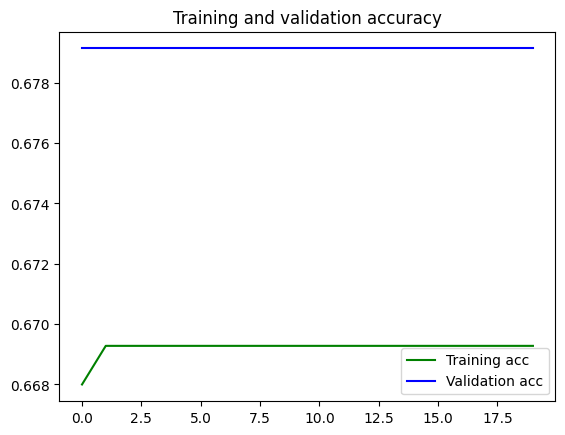

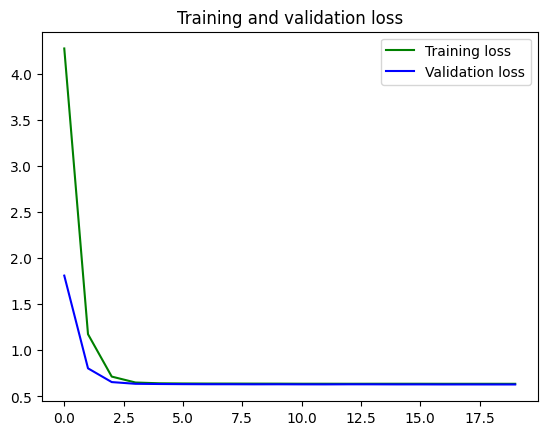

In [35]:
# Plot train/test loss and accuracy
plotLoss(cnn_1_bis)

In [36]:
# Find train and test f1
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9840
Testing Accuracy:  0.8482


      precision    recall  f1-score   support

           0       0.69      1.00      0.81      1996
           1       0.99      0.07      0.14       981

    accuracy                           0.69      2977
   macro avg       0.84      0.54      0.48      2977
weighted avg       0.79      0.69      0.59      2977

In [37]:
y_pred = cnn_bis.predict(X_test).astype(int)

y_scores = cnn_bis.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

94/94 [==============================] - 14s 150ms/step
Accuracy 0.6704736311723212
F1-score [0.80273477 0.        ]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.00      0.00      0.00       981

    accuracy                           0.67      2977
   macro avg       0.34      0.50      0.40      2977
weighted avg       0.45      0.67      0.54      2977



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN MODELLO 2

In [38]:
from keras.layers import ConvLSTM1D
from keras.layers import GlobalAveragePooling1D

In [39]:
print('Build model...')
cnn2 = Sequential()

# We start off with an efficient embedding layer which maps our vocab indices
# into embedding_dims dimensions
cnn2.add(Embedding(max_features, embedding_dims))

# We add a Convolution1D, which will learn
# word group filters of size filter_length:

# This layer creates a convolution kernel that is convolved with the layer input
# over a single spatial (or temporal) dimension to produce a tensor of outputs
cnn2.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=3, kernel_regularizer=l2(0.01)))

# We use max pooling:
cnn2.add(GlobalAveragePooling1D())

# We add a vanilla hidden layer:
cnn2.add(Dense(hidden_dims, kernel_regularizer=l2(0.01)))
cnn.add(Dropout(0.2))
cnn2.add(Activation('relu'))

# We add the second vanilla hidden layer:
cnn2.add(Dense(hidden_dims, kernel_regularizer=l2(0.01)))
cnn2.add(Dropout(0.2))
cnn2.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn2.add(Dense(1, kernel_regularizer=l2(0.01)))
cnn2.add(Activation('sigmoid'))

cnn2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cnn2.summary()

Build model...
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         3000000   
                                                                 
 conv1d_2 (Conv1D)           (None, None, 70)          350070    
                                                                 
 global_average_pooling1d (  (None, 70)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_6 (Dense)             (None, 250)               17750     
                                                                 
 activation_6 (Activation)   (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 250)               62750     
                                       

In [40]:
epochs = 20
cnn_2=cnn2.fit(X_train, y_train,
          batch_size=512,
          epochs=epochs,
          shuffle=True,
          validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 54s 5s/step - loss: 4.3409 - accuracy: 0.6649 - val_loss: 3.5503 - val_accuracy: 0.6695
Epoch 2/20
11/11 [==============================] - 54s 5s/step - loss: 3.1083 - accuracy: 0.6704 - val_loss: 2.6533 - val_accuracy: 0.6695
Epoch 3/20
11/11 [==============================] - 54s 5s/step - loss: 2.3812 - accuracy: 0.6704 - val_loss: 2.0831 - val_accuracy: 0.6695
Epoch 4/20
11/11 [==============================] - 55s 5s/step - loss: 1.8876 - accuracy: 0.6704 - val_loss: 1.6688 - val_accuracy: 0.6695
Epoch 5/20
11/11 [==============================] - 52s 5s/step - loss: 1.5238 - accuracy: 0.6704 - val_loss: 1.3636 - val_accuracy: 0.6695
Epoch 6/20
11/11 [==============================] - 54s 5s/step - loss: 1.2590 - accuracy: 0.6704 - val_loss: 1.1450 - val_accuracy: 0.6695
Epoch 7/20
11/11 [==============================] - 52s 5s/step - loss: 1.0710 - accuracy: 0.6704 - val_loss: 0.9901 - val_accuracy: 0.6695
Epoch 8/20
11/11 [==

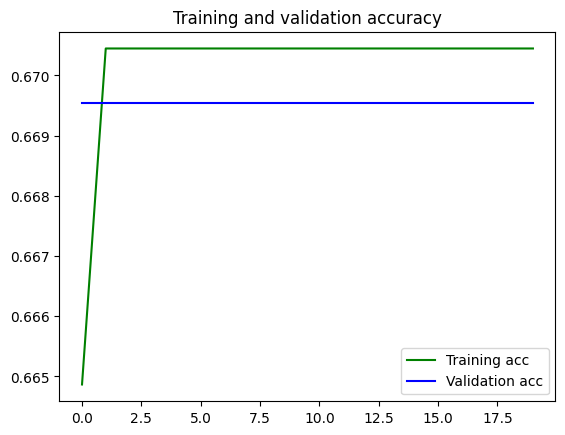

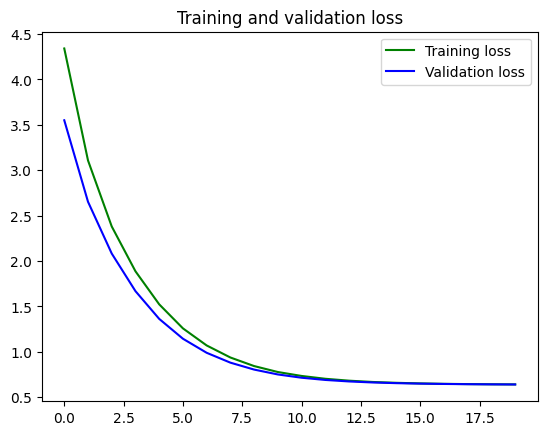

In [41]:
# Plot train/test loss and accuracy
plotLoss(cnn_2)

In [42]:
predictions = cnn2.predict(X_test)

94/94 [==============================] - 8s 88ms/step


In [43]:
# Find train and test f1
loss, accuracy = cnn2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnn2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6703
Testing Accuracy:  0.6705


In [44]:
y_pred = cnn2.predict(X_test).astype(int)

y_scores = cnn2.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

94/94 [==============================] - 7s 72ms/step
Accuracy 0.6704736311723212
F1-score [0.80273477 0.        ]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.00      0.00      0.00       981

    accuracy                           0.67      2977
   macro avg       0.34      0.50      0.40      2977
weighted avg       0.45      0.67      0.54      2977



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MODELLO 3


In [45]:
from tensorflow.keras.optimizers import RMSprop

In [46]:
print('Build model...')
cnn3 = Sequential()

# We start off with an efficient embedding layer which maps our vocab indices
# into embedding_dims dimensions
cnn3.add(Embedding(max_features, embedding_dims))

cnn3.add(Dropout(0.2))
# We add a Convolution1D, which will learn
# word group filters of size filter_length:

# This layer creates a convolution kernel that is convolved with the layer input
# over a single spatial (or temporal) dimension to produce a tensor of outputs
cnn3.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1, kernel_regularizer=l2(0.01)))
# We add a vanilla hidden layer:
cnn3.add(Dense(hidden_dims, kernel_regularizer=l2(0.01)))
cnn3.add(Dropout(0.2))
cnn3.add(Activation('relu'))

# We use max pooling:
cnn3.add(GlobalMaxPooling1D())



# We add the second vanilla hidden layer:
cnn3.add(Dense(hidden_dims, kernel_regularizer=l2(0.01)))
cnn3.add(Dropout(0.2))
cnn3.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn3.add(Dense(1, kernel_regularizer=l2(0.01)))
cnn3.add(Activation('sigmoid'))

cnn3.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

cnn3.summary()

Build model...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         3000000   
                                                                 
 dropout_8 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 70)          350070    
                                                                 
 dense_9 (Dense)             (None, None, 250)         17750     
                                                                 
 dropout_9 (Dropout)         (None, None, 250)         0         
                                                                 
 activation_9 (Activation)   (None, None, 250)         0         
                                                                 
 global_max_pooling1d_2 (Gl  (None, 250

In [47]:
epochs = 20
cnn_3=cnn3.fit(X_train, y_train,
          batch_size=512,
          epochs=epochs,
          shuffle=True,
          validation_split=0.1)

Epoch 1/20
13/13 [==============================] - 184s 14s/step - loss: 3.9848 - accuracy: 0.6410 - val_loss: 3.0517 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 184s 14s/step - loss: 2.6350 - accuracy: 0.6693 - val_loss: 2.1847 - val_accuracy: 0.6791
Epoch 3/20
13/13 [==============================] - 185s 14s/step - loss: 1.9274 - accuracy: 0.6693 - val_loss: 1.6315 - val_accuracy: 0.6791
Epoch 4/20
13/13 [==============================] - 185s 14s/step - loss: 1.4651 - accuracy: 0.6693 - val_loss: 1.2643 - val_accuracy: 0.6791
Epoch 5/20
13/13 [==============================] - 186s 14s/step - loss: 1.1487 - accuracy: 0.6693 - val_loss: 1.0094 - val_accuracy: 0.6791
Epoch 6/20
13/13 [==============================] - 185s 14s/step - loss: 0.9362 - accuracy: 0.6693 - val_loss: 0.8488 - val_accuracy: 0.6791
Epoch 7/20
13/13 [==============================] - 181s 14s/step - loss: 0.8003 - accuracy: 0.6693 - val_loss: 0.7409 - val_accuracy: 0.6791
Epoch 

In [48]:
predictions = cnn3.predict(X_test)

94/94 [==============================] - 21s 228ms/step


In [ ]:
# Find train and test f1
loss, accuracy = cnn3.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnn3.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [50]:
y_pred = cnn3.predict(X_test).astype(int)

y_scores = cnn3.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

94/94 [==============================] - 21s 224ms/step
Accuracy 0.6704736311723212
F1-score [0.80273477 0.        ]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.00      0.00      0.00       981

    accuracy                           0.67      2977
   macro avg       0.34      0.50      0.40      2977
weighted avg       0.45      0.67      0.54      2977



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## MODEL 4

In [54]:
print('Build model...')
cnn4 = Sequential()

# We start off with an efficient embedding layer which maps our vocab indices
# into embedding_dims dimensions
cnn4.add(Embedding(max_features, embedding_dims))

cnn4.add(Dropout(0.2))  # Utilizza Dropout anziché SpatialDropout1D

# We add a Convolution1D, which will learn
# word group filters of size filter_length:
cnn4.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1, kernel_regularizer=l2(0.01)))


# We use max pooling:
cnn4.add(GlobalAveragePooling1D())
cnn4.add(Dropout(0.2))  # Utilizza Dropout anziché SpatialDropout1D

# # We add a vanilla hidden layer:
cnn4.add(Dense(hidden_dims, kernel_regularizer=l2(0.01)))
cnn4.add(Dropout(0.2))  # Utilizza Dropout anziché SpatialDropout1D
# cnn4.add(Activation('tanh'))
# cnn4.add(Dropout(0.2))  # Utilizza Dropout anziché SpatialDropout1D

# # We add the second vanilla hidden layer:
# cnn4.add(Dense(hidden_dims))
# cnn4.add(Dropout(0.2))  # Utilizza Dropout anziché SpatialDropout1D
# cnn4.add(Activation('tanh'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn4.add(Dense(1, kernel_regularizer=l2(0.01)))
cnn4.add(Activation('sigmoid'))

cnn4.compile(loss='binary_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

cnn4.summary()


Build model...
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         3000000   
                                                                 
 dropout_11 (Dropout)        (None, None, 100)         0         
                                                                 
 conv1d_4 (Conv1D)           (None, None, 70)          350070    
                                                                 
 global_average_pooling1d_1  (None, 70)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_12 (Dropout)        (None, 70)                0         
                                                                 
 dense_12 (Dense)            (None, 250)               17750     
                                       

In [56]:
epochs = 20
cnn_4=cnn4.fit(X_train, y_train,
          batch_size=64,
          epochs=epochs,
          shuffle=True,
          validation_split=0.2)

Epoch 1/20
87/87 [==============================] - 149s 2s/step - loss: 2.5626 - accuracy: 0.6672 - val_loss: 2.5115 - val_accuracy: 0.6695
Epoch 2/20
87/87 [==============================] - 148s 2s/step - loss: 2.4755 - accuracy: 0.6704 - val_loss: 2.4411 - val_accuracy: 0.6695
Epoch 3/20
87/87 [==============================] - 149s 2s/step - loss: 2.4097 - accuracy: 0.6704 - val_loss: 2.3788 - val_accuracy: 0.6695
Epoch 4/20
87/87 [==============================] - 146s 2s/step - loss: 2.3491 - accuracy: 0.6704 - val_loss: 2.3191 - val_accuracy: 0.6695
Epoch 5/20
87/87 [==============================] - 148s 2s/step - loss: 2.2908 - accuracy: 0.6704 - val_loss: 2.2615 - val_accuracy: 0.6695
Epoch 6/20
87/87 [==============================] - 148s 2s/step - loss: 2.2330 - accuracy: 0.6704 - val_loss: 2.2060 - val_accuracy: 0.6695
Epoch 7/20
87/87 [==============================] - 146s 2s/step - loss: 2.1796 - accuracy: 0.6704 - val_loss: 2.1522 - val_accuracy: 0.6695
Epoch 8/20
87

In [57]:
predictions = cnn4.predict(X_test)

94/94 [==============================] - 25s 262ms/step


In [58]:
# Find train and test f1
loss, accuracy = cnn4.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnn4.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6703
Testing Accuracy:  0.6705


In [59]:
y_pred = cnn4.predict(X_test).astype(int)

y_scores = cnn4.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

94/94 [==============================] - 20s 218ms/step
Accuracy 0.6704736311723212
F1-score [0.80273477 0.        ]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.00      0.00      0.00       981

    accuracy                           0.67      2977
   macro avg       0.34      0.50      0.40      2977
weighted avg       0.45      0.67      0.54      2977



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## PROVO A BILANCIARE USANDO IL MODELLO MIGLIORE

In [60]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

SMOTE_ENN = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'),random_state=42)
X_res, y_res = SMOTE_ENN.fit_resample(X_train, y_train)

In [61]:
print('Build model...')
cnn_imb = Sequential()

# We start off with an efficient embedding layer which maps our vocab indices
# into embedding_dims dimensions
cnn_imb.add(Embedding(max_features, embedding_dims))

cnn_imb.add(Dropout(0.2))

# We add a Convolution1D, which will learn
# word group filters of size filter_length:

# This layer creates a convolution kernel that is convolved with the layer input
# over a single spatial (or temporal) dimension to produce a tensor of outputs
cnn_imb.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1, kernel_regularizer=l2(0.01)))

# We use max pooling:
cnn_imb.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
cnn_imb.add(Dense(hidden_dims, kernel_regularizer=l2(0.01)))
cnn_imb.add(Dropout(0.2))
cnn_imb.add(Activation('relu'))

# We add the second vanilla hidden layer:
cnn_imb.add(Dense(hidden_dims, kernel_regularizer=l2(0.01)))
cnn_imb.add(Dropout(0.2))
cnn_imb.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn_imb.add(Dense(1, kernel_regularizer=l2(0.01)))
cnn_imb.add(Activation('sigmoid'))

cnn_imb.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

cnn_imb.summary()

Build model...
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         3000000   
                                                                 
 dropout_14 (Dropout)        (None, None, 100)         0         
                                                                 
 conv1d_5 (Conv1D)           (None, None, 70)          350070    
                                                                 
 global_max_pooling1d_3 (Gl  (None, 70)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_14 (Dense)            (None, 250)               17750     
                                                                 
 dropout_15 (Dropout)        (None, 250)               0         
                                       

In [62]:
epochs = 20
cnn_1_imb=cnn_imb.fit(X_train, y_train,
          batch_size=128,
          epochs=epochs,
          shuffle=True,
          validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 149s 3s/step - loss: 2.9727 - accuracy: 0.6690 - val_loss: 1.6971 - val_accuracy: 0.6695
Epoch 2/20
44/44 [==============================] - 151s 3s/step - loss: 1.2238 - accuracy: 0.6704 - val_loss: 0.8958 - val_accuracy: 0.6695
Epoch 3/20
44/44 [==============================] - 147s 3s/step - loss: 0.7752 - accuracy: 0.6704 - val_loss: 0.7022 - val_accuracy: 0.6695
Epoch 4/20
44/44 [==============================] - 167s 4s/step - loss: 0.6660 - accuracy: 0.6704 - val_loss: 0.6504 - val_accuracy: 0.6695
Epoch 5/20
44/44 [==============================] - 147s 3s/step - loss: 0.5784 - accuracy: 0.7171 - val_loss: 0.6503 - val_accuracy: 0.7034
Epoch 6/20
44/44 [==============================] - 148s 3s/step - loss: 0.4333 - accuracy: 0.8839 - val_loss: 0.6273 - val_accuracy: 0.7739
Epoch 7/20
44/44 [==============================] - 147s 3s/step - loss: 0.2818 - accuracy: 0.9608 - val_loss: 0.6195 - val_accuracy: 0.7991
Epoch 8/20
44

In [63]:
predictions = cnn_imb.predict(X_test)

94/94 [==============================] - 20s 213ms/step


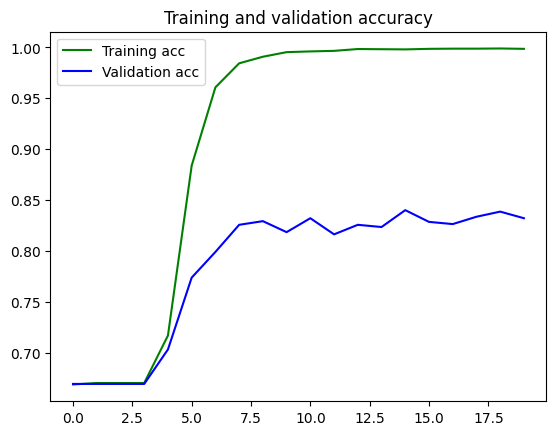

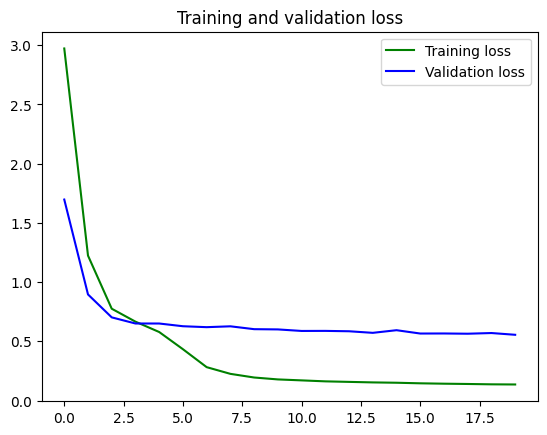

In [64]:
# Plot train/test loss and accuracy
plotLoss(cnn_1_imb)

In [65]:
# Find train and test f1
loss, accuracy = cnn_imb.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = cnn_imb.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9659
Testing Accuracy:  0.8398


In [66]:
y_pred = cnn_imb.predict(X_test).astype(int)

y_scores = cnn_imb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))

print('F1-score %s' % f1_score(y_test, y_pred, average=None))

print(classification_report(y_test, y_pred))

94/94 [==============================] - 21s 222ms/step
Accuracy 0.6704736311723212
F1-score [0.80273477 0.        ]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.00      0.00      0.00       981

    accuracy                           0.67      2977
   macro avg       0.34      0.50      0.40      2977
weighted avg       0.45      0.67      0.54      2977



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
